In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
duplicated = df[df.duplicated()]
print("Duplicate rows: ")
duplicated

Duplicate rows: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of 0. 
Pregnancies can be zero, but the rest cannot. 
We can handle thjis by imputation, replace the zeros with the mean of each column.

In [7]:
print("No of zeros:")
for column in df.columns:
    print(f"{column}: ",df[column].isin([0]).sum())

No of zeros:
Pregnancies:  111
Glucose:  5
BloodPressure:  35
SkinThickness:  227
Insulin:  374
BMI:  11
DiabetesPedigreeFunction:  0
Age:  0
Outcome:  500


In [8]:
# Lets replace all the zero with mean value of the column
df_prep=df.copy()

df_prep['Glucose']=df_prep['Glucose'].replace(0,df['Glucose'].mean())
df_prep['BloodPressure']=df_prep['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_prep['SkinThickness']=df_prep['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_prep['Insulin']=df_prep['Insulin'].replace(0,df['Insulin'].mean())
df_prep['BMI']=df_prep['BMI'].replace(0,df['BMI'].mean())

In [9]:
# Let us create a copy of the dataframe with Pregnancies greater than 1 replaced with 1.

df_prep1 = df_prep.copy()
df_prep1['Pregnancies'].values[df_prep1['Pregnancies'] >1]=1

In [10]:
#Let's check the two new datasets

df_prep.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df_prep1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since our dependent variable is binary where 0 is non-dibetic and 1 is diabetic, then we can use Logistic Regression. 

In [12]:
corr = df_prep.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

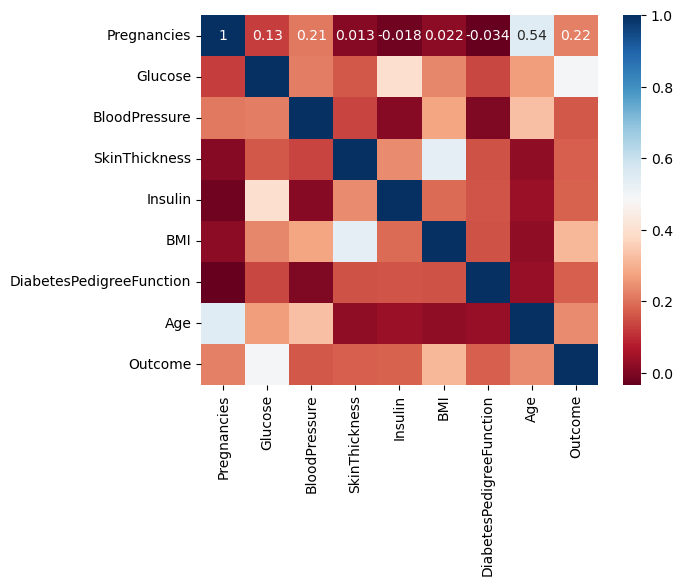

In [13]:
sns.heatmap(corr, cmap="RdBu", annot=True)

In [14]:
corr1 = df_prep1.corr()
corr1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.017816,-0.038159,-0.067654,-0.008117,-0.161757,-0.060780,0.197159,0.005705
Glucose,-0.017816,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,-0.038159,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.067654,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.008117,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,-0.161757,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.060780,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.197159,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.005705,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

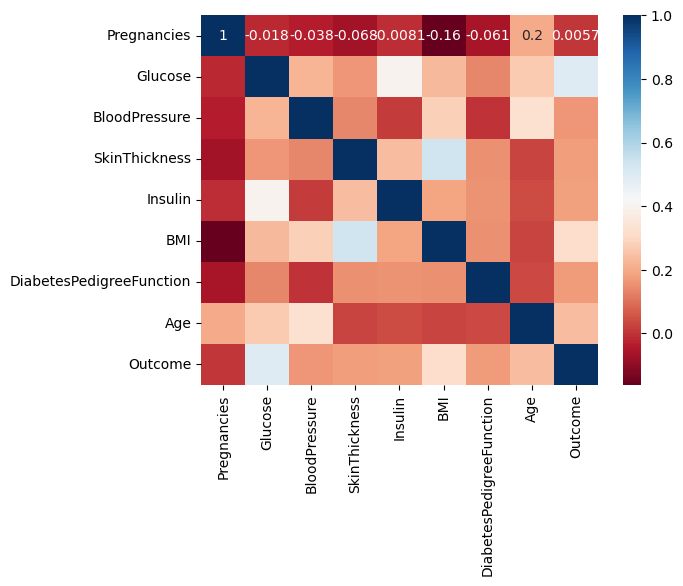

In [15]:
sns.heatmap(corr1, cmap="RdBu", annot=True)

* With the dataset with the original Pregnancies data, we can see high correlation with Age and Outcome, so let us continue with the data with Pregancies value greater than 1 replaced with 1.
* There is a strong correlation between BMI and SkinThickness.
* The Outcome is strongly correlated to BMI and Glucose.
* A correlation can be observed in Glucose and Insulin, and Age and BloodPressure.

Text(0.5, 1.0, 'Insulin Vs Glucose')

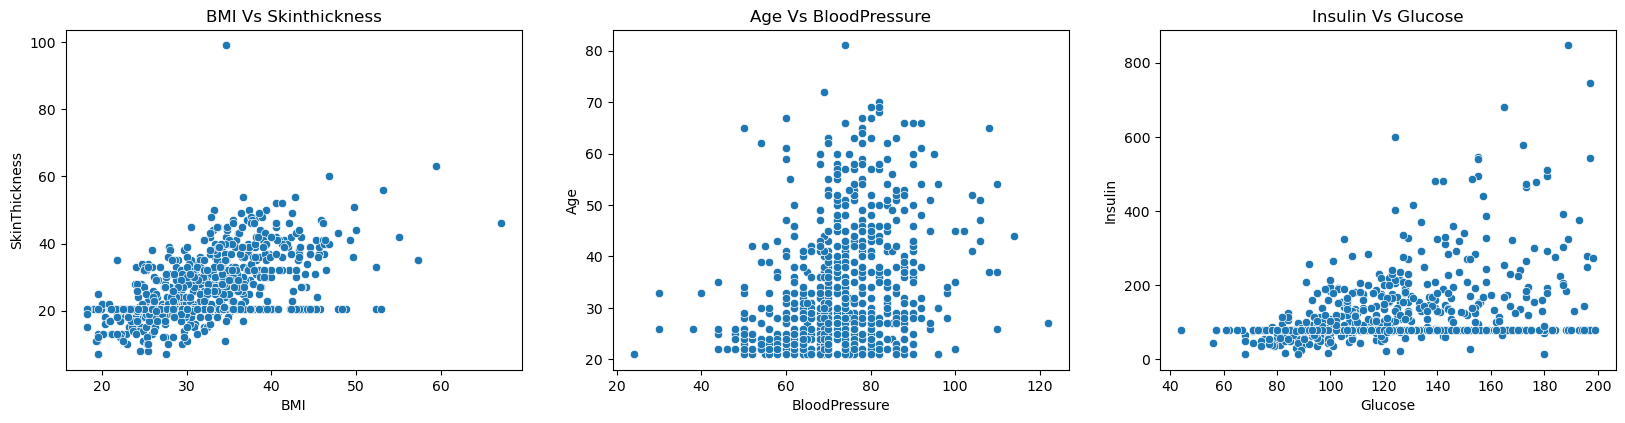

In [16]:
# Evaluate more insights with the relationship of the features mentioned above.

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.scatterplot(data=df_prep1,x="BMI",y="SkinThickness")
plt.title('BMI Vs Skinthickness')
plt.subplot(3,3,2)
sns.scatterplot(data=df_prep1,x="BloodPressure",y="Age")
plt.title('Age Vs BloodPressure')
plt.subplot(3,3,3)
sns.scatterplot(data=df_prep1,x="Glucose",y="Insulin")
plt.title('Insulin Vs Glucose')

As can be seen in the scatterplot above, there is a strong relationship between SkinThickness and BMI. However, comparing each of their relationship to Outcome, BMI has higher correlation to it compared to SkinThickness.

In [17]:
# Drop SkinThickness

df=df_prep1.drop('SkinThickness',axis=1)

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


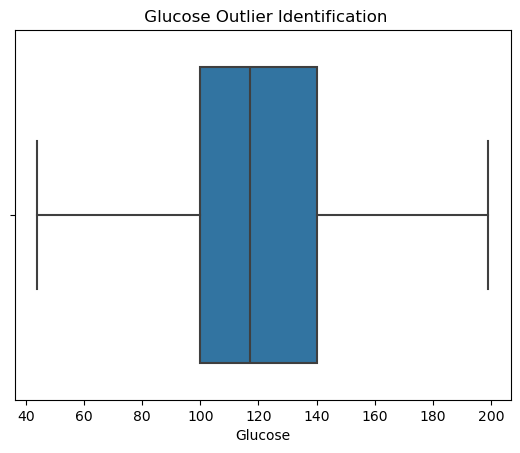

In [19]:
# Detect outliers in Glucose

sns.boxplot(x = df['Glucose'])
plt.title(' Glucose Outlier Identification')
plt.show()

No outlier detected.

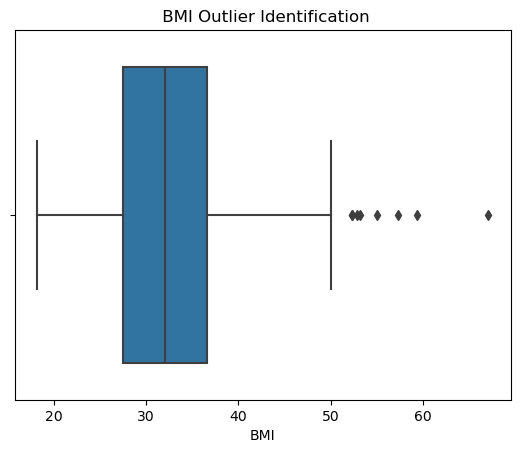

In [20]:
# Detect outliers in BMI

sns.boxplot(x = df['BMI'])
plt.title(' BMI Outlier Identification')
plt.show()

In [21]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [22]:
outliers = find_outliers_IQR(df['BMI'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 8
max outlier value: 67.1
min outlier value: 52.3


120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64

Let's create another dataframe without the outliers.

In [23]:
# Drop the outliers
df_no_outliers = df[~df['BMI'].isin(outliers)]

In [24]:
df_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.859211,121.519043,72.158666,118.037377,32.200945,0.468833,33.307895,0.344737
std,0.348033,30.416007,11.904911,91.108631,6.444224,0.324743,11.791444,0.475595
min,0.000000,44.000000,24.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,79.799479,27.500000,0.242500,24.000000,0.000000
50%,1.000000,117.000000,72.000000,79.799479,32.000000,0.370000,29.000000,0.000000
75%,1.000000,140.000000,80.000000,126.250000,36.400000,0.624500,41.000000,1.000000
max,1.000000,199.000000,122.000000,846.000000,50.000000,2.329000,81.000000,1.000000


### Data modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]
X1 = df_no_outliers.drop(["Outcome"], axis = 1)
y1 = df_no_outliers["Outcome"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)
X_train.shape, X_test.shape

((537, 7), (231, 7))

In [31]:
# First model with the outliers
lr = LogisticRegression(max_iter = 1000)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231



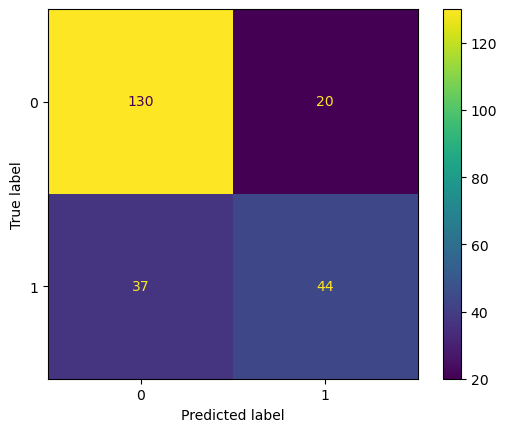

In [36]:
cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

In [28]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1, test_size = 0.30, stratify = y1, random_state = 42)
X1_train.shape, X1_test.shape

((532, 7), (228, 7))

In [39]:
# Second model with no outliers
lr1 = LogisticRegression(max_iter = 1000)
model1 = lr1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       149
           1       0.73      0.51      0.60        79

    accuracy                           0.76       228
   macro avg       0.75      0.70      0.71       228
weighted avg       0.76      0.76      0.75       228



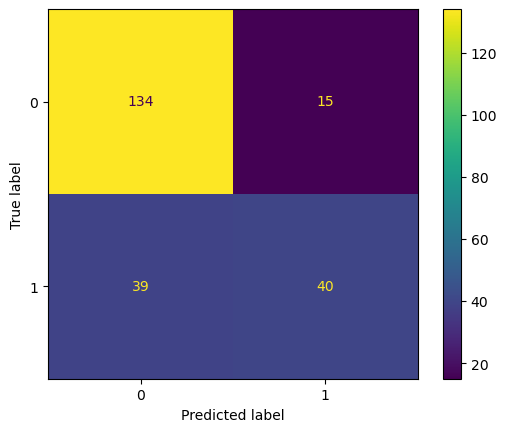

In [40]:
cm=confusion_matrix(y1_test,y1_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y1_test,y1_pred))